# Fire detection in Nature park

### Problem Setting
Fires in natural areas whether it is in a forest, natural park, or any other natural setting, is also called wildfires. Wildfires feed on natural combustion materials such as bushes, wood, and so on. Wildfires can either start due to natural reasons such as drought or in rare cases lighting but they could also occur due to human factors such as burning campfires or cigarettes. There are 3 factors that wildfire needs to grow any combustion materials natural or otherwise, oxygen and a heat source, then depending on environmental factors such as wind, the amount of fuel/combustion material near, and so on.

According to [reports](https://sgp.fas.org/crs/misc/IF10244.pdf), wildfires in the US alone since 2000 have been reported to have an annual average of 70,072 burning in the process an annual average of 7.0 million acres. 

Wildfires can cause a wide variety of issues as the amount of animal, and human lives fatalities in the process are not negligible, in addition to the effect it has on the ecosystem and biodiversity. Wildfires release a considerable amount of greenhouse gases as well that are recognized as air pollutants.
There is agreement in the scientific community that climate change is contributing to the increased risk of wildfires and therefore would mean that wildfires would occur more frequently. Some regions take decades to recover for the ecosystem to recover from the damage caused by the wildfire.

A timely response to the wildfire and correctly estimating the size and severity of the fire can be of crucial importance. 




In this project, I attempt to use a machine learning approach to accurately predict the area affected by a wildfire using the data of the Fire-Wheather-Index (FWI) and thus responding appropriately to the fire breakouts. In the machine learning world, this problem would be considered a regression problem since the prediction variable(affected area) is continuous. 

### EDA

In [2]:
#Imports
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import warnings
import time

warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(10,10)})

In [3]:
#Read in data
df=pd.read_csv('fires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Variables 
> X,Y: are coordinates on the map

> day , month: represent the day and month the fire happened

>FFMC:represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101. Subtracting the FFMC value from 100 can provide an estimate for the equivalent (approximately 10h) fuel moisture content, most accurate when FFMC values are roughly above 80.

>DMC: represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. It may provide insight to live fuel moisture stress.

>DC: represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels. It is unitless, with a maximum value of 1000. Extreme drought conditions have produced DC values near 800.



>ISI:  It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential. ISI is a key input for fire behavior predictions in the FBP system. It is unitless and open ended.

>temp :temperature in degrees Celsius: 2.2 to 33.3

>RH :relative humidity in %: 15 to 100

> wind :wind velocity in km/h: 0.4 to 9.4

> rain :rainfall in mm/m2 0.0 to 6.4

> area :forest area that has been burnt in hectare: 0.09 to 1090.84

In [4]:
#Check missing data and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
#getting summary statistics for the numerical variables 
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
#checking day values 
print(df.day.unique())
#checking month values 
print(df.month.unique())

['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


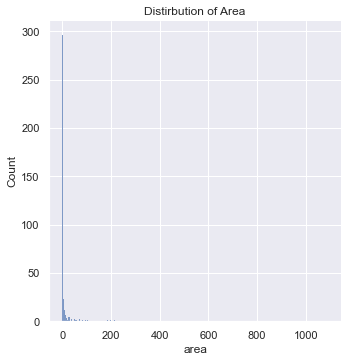

In [7]:
#Checking distribution of area(target variable)
sns.displot(df["area"]).set(title='Distirbution of Area');

Distribution of area is very concenrated around zero so a transfomation to make it more uniform and thus helps to make  predication easier

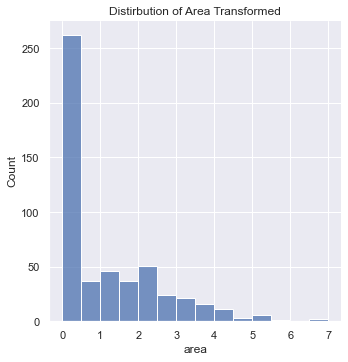

In [8]:
#Distribution of Transformed area recommended in sheet and in paper
sns.displot(x=np.log(1+df["area"])).set(title='Distirbution of Area Transformed');

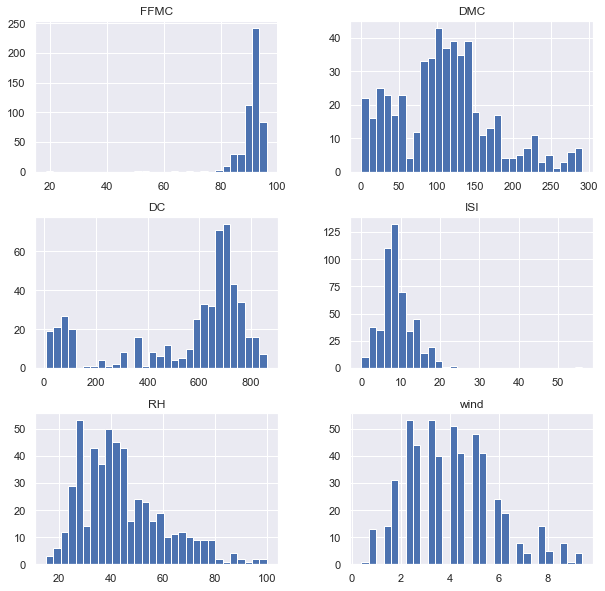

In [52]:
#Histogram of all numerical variables 
df[['FFMC','DMC','DC','ISI','RH','wind']].hist(bins=30, figsize=(10, 10));

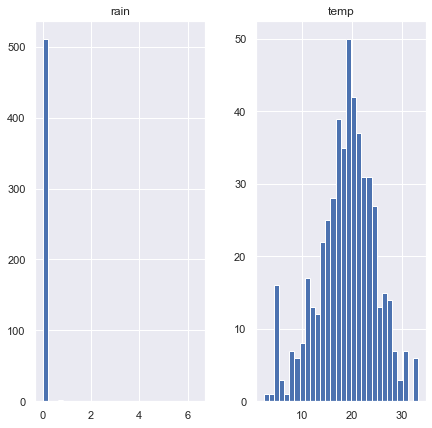

In [49]:
df[['rain','temp']].hist(bins=30, figsize=(7, 7));

>FFMC:values are concentrated around 90 which is also the peak similar to a normal distribution shifted 

>DMC: Two peaks around 40 and 100 similar to a combination of two gaussians.

>DC: Two peaks around 100 and 700 similar to a combination of two gaussians.

>ISI:  Values are concentrated around 10 which is also the peak similar to a normal distribution shifted 

>temp : Looks pretty much like a normal distribution centered around 20 

>RH :Peak around 30 could be a mix of guassians 

> wind : shaped like a guassian but with a wide peak

> rain : very non uniform and centered near 0 


In [10]:
#checking only linear correlation between features
df.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


It does look like the linear correlation is weak between any of the input variables and our target variable area

In [11]:
#check for polynomial linear correlation 
poly = PolynomialFeatures(2,include_bias=False)#setting the polynomial power to 2 for all terms
df_squareded=poly.fit_transform(df[
    ['DC', 'DMC', 'FFMC', 'ISI', 'RH', 'rain', 'temp',  'wind']])#chose numeric values which made sense


In [12]:
 #transforming into a dataframe
df_squareded=pd.DataFrame(df_squareded, 
             columns=poly.get_feature_names(
                 ['DC', 'DMC', 'FFMC', 'ISI', 'RH', 'rain', 'temp',  'wind']))


In [13]:
#checking for any terms with linear correlation to our target variable  above 0.1
print(df_squareded.corrwith(df['area'])[df_squareded.corrwith(df['area'])>0.1])

DMC temp    0.108055
temp^2      0.104599
dtype: float64


> Might be worth exploring adding these combinations to the model to see if performance improves with no overfitting

#### Visulaization

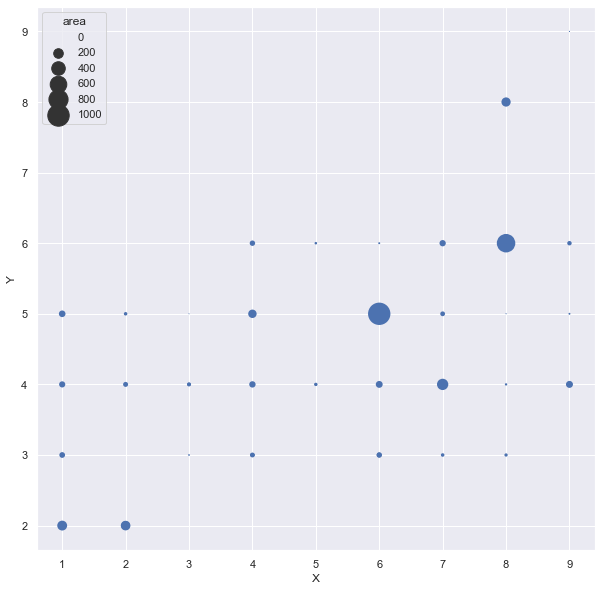

In [14]:
#plotting on a grid the location of the fires with the size of the dots representing the area affectted
sns.scatterplot(data=df, x="X", y="Y",size='area',sizes=(0, 500));

#### Using weekend as a factor

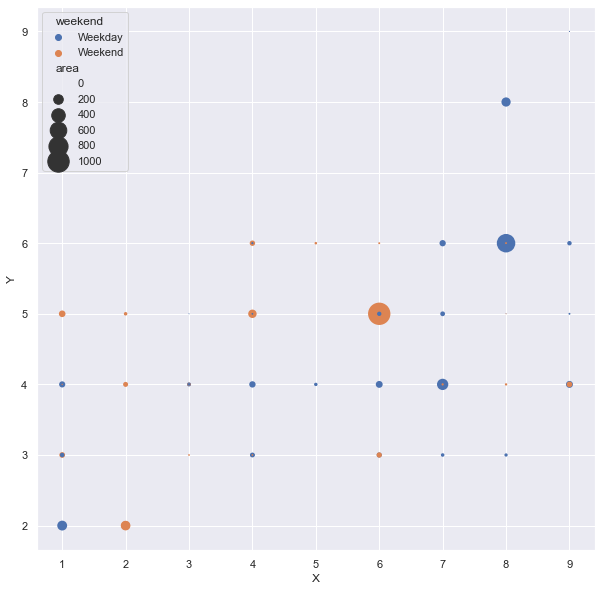

In [15]:
#checking if being a weekend has some patterns in size of fires
df['weekend']=np.where((df['day']=='sat') | (df['day']=='sun') ,'Weekend', 'Weekday')
sns.scatterplot(data=df, x="X", y="Y",size='area',sizes=(0, 500),hue="weekend");

In [16]:
print('number of fires on weekend {} and number of fires on weekday {}'.format(
    sum(df['weekend']=='Weekend'),sum(df['weekend']=='Weekday')))

number of fires on weekend 179 and number of fires on weekday 338


In [17]:
print('average area affected on weekend {} and average area affected on weekday {}'.
      format(
df[df['weekend']=='Weekend']['area'].mean(),
          df[df['weekend']=='Weekday']['area'].mean()))


average area affected on weekend 17.345195530726258 and average area affected on weekday 10.465266272189348


> The number of fires on weekends is 0.52 the number of fires on weekdays where the ratio if it is uniformly distributed over the week  should be 0.4 the number of fires on weekdays

> The average area affected on weekend is 17.345 and on weekdays 10.465 which is not a small difference.

> It seems that fires on weekends are on average bigger and to some extent more than expected on the weekend

#### Using seasons as a factor

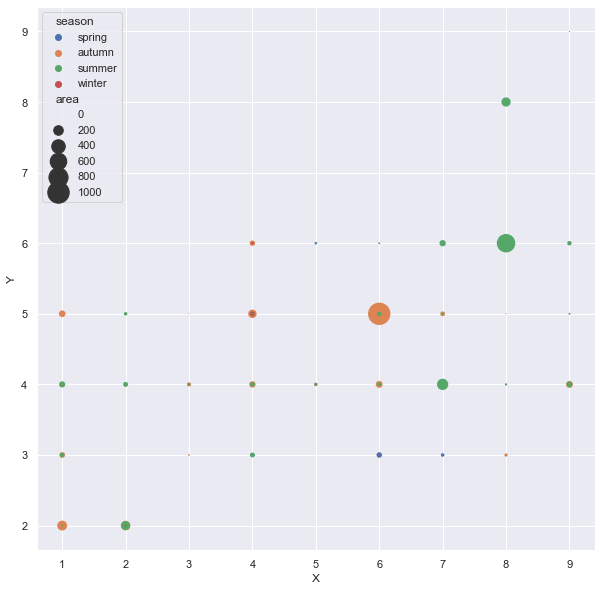

In [18]:
#checking if the season affects number of fires and size of area affected 
conditions = [
    (df['month'] == 'aug') | (df['month'] == 'jun') | (df['month'] == 'jul'),
    (df['month'] == 'sep') | (df['month'] == 'oct') | (df['month'] == 'nov'),
    (df['month'] == 'dec') | (df['month'] == 'jan') | (df['month'] == 'feb'),
    (df['month'] == 'mar') | (df['month'] == 'apr') | (df['month'] == 'may')]
choices = ['summer', 'autumn', 'winter','spring']
df['season'] = np.select(conditions, choices)
sns.scatterplot(data=df, x="X", y="Y",size='area',sizes=(0, 500),hue="season");

In [19]:
print('''
number of fires in summer {} , number of fires in autumn  {} , 
number of fires in winter  {}, and  number of fires in spring  {}'''
.format(sum(df['season']=='summer'),sum(df['season']=='autumn')
,sum(df['season']=='winter'),sum(df['season']=='spring')))




number of fires in summer 233 , number of fires in autumn  188 , 
number of fires in winter  31, and  number of fires in spring  65


In [20]:
print('''
average area of fires in summer {} , average area of fires in autumn  {} ,
average area of fires in winter  {}, and  average area of fires in spring  {}''' 
.format(df[df['season']=='summer']['area'].mean(),df[df['season']=='autumn']
['area'].mean(),df[df['season']=='winter']['area'].mean(),df[df['season']=='spring']['area'].mean()))





average area of fires in summer 12.262317596566525 , average area of fires in autumn  16.94521276595744 ,
average area of fires in winter  7.918387096774193, and  average area of fires in spring  5.442461538461539


> Number of fires in summer and autumn are much more than spring and winter maybe due to the high tempreatures, the availiability of natural fuels

> The average area affectted seems to be greatest in autumn followed by summer and it seems there is a gap between these two seasons , and spring annd winter

### Feature engineering 

> To include the caterogical variables in my models I will use one-hot-encoding to create columns for n-1 classes of the caterogical variable with value 1 if the row beloings to that class and zero otherwise.

> To include polynomials factors I will concat all of them to the dataframe

> I preform minimum maximum normalization for the numeric variables to make sure that the difference in range for each variable doesn't affect although not all models benefit from this it doesn't harm them for sure, and some models like linear regression really do benefit from  it.

>The min max transformation preformed by sklearn is X_std = (X - X.min) / (X.max - X.min)
X_scaled = X_std * (max - min) + min where by default max=1 and min=0

In [21]:
#One hot encoding of day and month
df = df.join(pd.get_dummies(df['day'],drop_first=True))
df = df.join(pd.get_dummies(df['month'],drop_first=True))
df=df.join(pd.get_dummies(df['season'],drop_first=True))
df=df.join(pd.get_dummies(df['weekend'],drop_first=True))

In [22]:
#Concat the polynomial features with the original dataframe
df=(pd.concat([df,df_squareded],axis=1))
df = df.loc[:,~df.columns.duplicated()]

In [23]:
#Normalizing features using minmax normalization which scales the varaiables between 0 and 1
scaler = preprocessing.MinMaxScaler()
names = ['FFMC','DMC','DC','ISI','RH','wind','rain','temp','DC^2',    
         'DC DMC',   'DC FFMC',
          'DC ISI',     'DC RH',   'DC rain',   'DC temp',   'DC wind',
           'DMC^2',  'DMC FFMC',   'DMC ISI',    'DMC RH',  'DMC rain',
        'DMC temp',  'DMC wind',    'FFMC^2',  'FFMC ISI',   'FFMC RH',
       'FFMC rain', 'FFMC temp', 'FFMC wind',     'ISI^2',    'ISI RH',
        'ISI rain',  'ISI temp',  'ISI wind',      'RH^2',   'RH rain',
         'RH temp',   'RH wind',    'rain^2', 'rain temp', 'rain wind',
          'temp^2', 'temp wind',    'wind^2']
d = scaler.fit_transform(df[names])
scaled_df = pd.DataFrame(d, columns=names)

In [24]:
df=(pd.concat([df,scaled_df],axis=1))
df = df.loc[:,~df.columns.duplicated()]

In [25]:
#dropping hot encoded vectors
df.drop(['month','day','season','weekend'],inplace=True,axis=1)

In [26]:
#Transforming area to log(1+area)
df['area_dash']=np.log(1+df["area"])

In [27]:
#checking for correlation with area_dash

print(df.corrwith(df['area_dash'])[df.corrwith(df['area_dash'])>0.05])

X            0.061995
DMC          0.067153
DC           0.066360
temp         0.053487
wind         0.066973
area         0.524134
dec          0.139159
sep          0.082638
winter       0.060997
DC^2         0.060994
DC DMC       0.069120
DC FFMC      0.067690
DC temp      0.086110
DC wind      0.087546
DMC^2        0.059826
DMC FFMC     0.068400
DMC temp     0.093185
DMC wind     0.069766
FFMC temp    0.057828
FFMC wind    0.068929
temp^2       0.080952
temp wind    0.059740
wind^2       0.068667
area_dash    1.000000
dtype: float64


### Feature selection and modelling



* Since we now have quite a bit of variables might be a good idea to do some feature selection therefore I will use forward feature selection which starts from one variables and keeps adding variable until some scoring metric is not improving anymore.My feature selector will try to choose half of the variables avaliable. 

* I will also preform hyperparameters optimatization for all models where there are hyperparameters to be tuned in a reasonable scope.

* The way I will select features and hyperparameters and then evaulate the model will be through nested cross validation. Using 5-fold CV the data is split in training and testing, then the training data is split once more for a 5-fold CV for hyperparameter optimatization and feature selection, then the best features and hyperaparameters are corss validated on the outer 5-Fold split the results from the 5 splits are then averaged.

* The models are ran once with feature selection and once with all the featrues to check the effect of feature selection.


In [28]:
X=df[df.columns.difference(['area', 'area_dash'])]#Everything except target variable
y=df['area_dash']#target variable


In [29]:
#Not used 
def train_and_evaulate(X,y,estimatator):
    '''
    Describtion:
    Function to train and evaulate estimator using cross validation on the full dataset
    scores used to evaluate are r2 and MSE.
    
    input:                                                    output:                  
    Estimator : Model                                         res:MSE,R2,MAE average on test CV
    X:Independent variable(used for predication)
    y:Dependent Variable (Target for predication)
    '''
    cv=cross_validate(estimatator, X, y, cv=5,
                         scoring=('r2', 'neg_mean_squared_error','neg_mean_absolute_error'),
                        return_train_score=False)
    
    return np.mean(-cv['test_neg_mean_squared_error']),np.mean(cv['test_r2']),np.mean(-cv['test_neg_mean_absolute_error'])



In [30]:
def Pipeline(estimator,X,y,scoring,parameters,select_features,tune_parameters):
    '''
    Describtion:
    Our pipeline that trains the model chooses features and the ideal hyperparameters and then 
    uses the train_and_evaulate function to get the results of the model.
    
    input                                                                        
    Estimator : Model                                                            
    X:Independent variable(used for predication)
    y:Dependent Variable (Target for predication)
    scoring:scoring method used in cross validation and feature selection
    parameters: dict of hyperparameters to check the best combination over
    select_features: Boolean to decide if feature selection will be done
    tune_parameters: Boolean to decide if hyperparameters tuning will be done 
     
     output: 
     
     res:dictornary containing MSE,R2,MAE,Time of model
    '''
    res={}#dict to return
    
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)
    outer_results = {}
    outer_results['MSE']=[]
    outer_results['R2']=[]
    outer_results['MAE']=[]
    outer_results['TIME']=[]
    for train_ix, test_ix in cv_outer.split(X):
        # split data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        start = time.process_time()
        #to record time taken for each model 
        cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
        if select_features:
            sfs = SequentialFeatureSelector(estimator(),scoring=scoring,cv=cv_inner)

            X_train_filtered=sfs.fit_transform(X_train, y_train)
            X_test_filtered=sfs.transform(X_test)
            if tune_parameters:
                
                
                clf = GridSearchCV(estimator(), parameters,scoring=scoring,cv=cv_inner)
                clf.fit(X_train_filtered, y_train)
                y_pred=clf.predict(X_test_filtered)
                MSE=mean_squared_error(y_test,y_pred)
                R2=r2_score(y_test,y_pred)
                MAE=mean_absolute_error(y_test,y_pred)
                t_taken=time.process_time() - start
                print('time taken to feature select ,tune hyperparameters and cross validate ',t_taken)

            else:

                clf=estimator().fit(X_train_filtered, y_train)
                y_pred=clf.predict(X_test_filtered)
                MSE=mean_squared_error(y_test,y_pred)
                R2=r2_score(y_test,y_pred)
                MAE=mean_absolute_error(y_test,y_pred)
                t_taken=time.process_time() - start
                print('time taken to feature select and cross validate ',t_taken)
        else:
            if tune_parameters:

                clf = GridSearchCV(estimator(), parameters,scoring=scoring,cv=cv_inner)
                clf.fit(X_train, y_train)
                y_pred=clf.predict(X_test)
                MSE=mean_squared_error(y_test,y_pred)
                R2=r2_score(y_test,y_pred)
                MAE=mean_absolute_error(y_test,y_pred)
                t_taken=time.process_time() - start
                print('time taken to tune hyperparameters and cross validate ',t_taken)

            else:

                clf=estimator().fit(X_train, y_train)
                y_pred=clf.predict(X_test)
                MSE=mean_squared_error(y_test,y_pred)
                R2=r2_score(y_test,y_pred)
                MAE=mean_absolute_error(y_test,y_pred)
                t_taken=time.process_time() - start
                print('time taken to cross validate ',t_taken)
        outer_results['MSE'].append(MSE)
        outer_results['MAE'].append(MAE)
        outer_results['R2'].append(R2)
        outer_results['TIME'].append(t_taken)
    
    res['MSE']=np.mean(outer_results['MSE'])
    res['R2']=np.mean(outer_results['R2'])
    res['MAE']=np.mean(outer_results['MAE'])
    res['Time']=np.mean(outer_results['TIME'])
    return res

### Models and feature selection

1. Linear Regression 
    1. Linear Regression with feature selection.
    2. Linear Regression without feature selection.
2. Linear Regression with Lasso Regularization
    1. Linear Regression with Lasso Regularization, and feature selection.
    2. Linear Regression with Lasso Regularization without feature selection.
3. Linear Regression with Ridge Regularization 
    1. Linear Regression with Ridge Regularization and feature selection.
    2. Linear Regression with Ridge Regularization without feature selection.
4. Supoort vector regression
    1. Supoort vector regression with feature selection.
    2. Supoort vector regression without feature selection.
5. Random Forrest Regression 
    1. Random Forrest Regression with feature selection.
    2. Random Forrest Regression without feature selection.

#### 1.Linear Regression

> In ordinary Linear regression the loss function used is the squared loss it assumes that the target variable Y is related to tthe independent variables X in the manner of $ \hat{Y}=  \theta X+C$.


> The goal is to choose theta in a way that makes $\hat{Y}$ as close as possible to the target Y 

> In mathematical terms this is expressed as follows $ \hat{\theta}= \underset{\theta}{\operatorname{argmin}} (X \theta-Y)^T (X \theta-Y)$


> Linear Regression is one of the models that can really benefit from feature selection 

##### 1.A Linear Regression with feature selection 

In [31]:
LR_FS=Pipeline(LinearRegression,X,y,'neg_mean_squared_error',{},select_features=True,tune_parameters=False)
LR_FS

time taken to feature select and cross validate  34.367874
time taken to feature select and cross validate  38.284271
time taken to feature select and cross validate  35.53029500000001
time taken to feature select and cross validate  35.89674799999999
time taken to feature select and cross validate  33.529608999999994


{'MSE': 2.476361724544896,
 'R2': -0.28393276838854714,
 'MAE': 1.204457334807172,
 'Time': 35.52175939999999}

##### 1.B Linear Regression without feature selection 

In [32]:
LR_=Pipeline(LinearRegression,X,y,'neg_mean_squared_error',{},select_features=False,tune_parameters=False)
LR_

time taken to cross validate  0.021398000000004913
time taken to cross validate  0.0170710000000156
time taken to cross validate  0.015920999999991636
time taken to cross validate  0.015769000000005917
time taken to cross validate  0.015218000000004395


{'MSE': 4.617187047598079,
 'R2': -1.282034645709429,
 'MAE': 1.3550017275028126,
 'Time': 0.017075400000004494}

#### 2.Lasso Regression 

Lasso regression differs from ordinary linear regression as the minimization critrea now includes a regularizer that aims to deter too much increase in the parameters of the model.This regularizer is a hyperparameter that needs to be tunes
> In mathematical terms this is expressed as follows $ \hat{\theta}= \underset{\theta}{\operatorname{argmin}} (X \theta-Y)^T (X \theta-Y) + \lambda \theta$ 

> Lasso Regression is one of the models where the coefficents of non-important feaures can go to zero so in some sense it does it's own feature selection which is why similar results are expected with and without feature selection 

##### 2.A Lasso Regression with feature selection

In [33]:
#Hyperparameter space to search from 
lambdas = np.linspace(0.001, 30, 50)# we choose from 50 equidistant values for lambda between 0.01 and 30
grid = dict()
grid['alpha'] = lambdas
Lasso_FS=Pipeline(Lasso,X,y,'neg_mean_squared_error',grid,select_features=True,tune_parameters=True)
Lasso_FS

time taken to feature select ,tune hyperparameters and cross validate  10.793268999999981
time taken to feature select ,tune hyperparameters and cross validate  8.333348999999998
time taken to feature select ,tune hyperparameters and cross validate  9.00510700000001
time taken to feature select ,tune hyperparameters and cross validate  11.183481
time taken to feature select ,tune hyperparameters and cross validate  8.185461000000004


{'MSE': 2.0235828042202044,
 'R2': -0.040117341446570844,
 'MAE': 1.1707243000672851,
 'Time': 9.5001334}

##### 2.B Lasso without feature selection 

In [34]:
Lasso_=Pipeline(Lasso,X,y,'neg_mean_squared_error',grid,select_features=False,tune_parameters=True)
Lasso_

time taken to tune hyperparameters and cross validate  8.883043999999984
time taken to tune hyperparameters and cross validate  9.235694999999993
time taken to tune hyperparameters and cross validate  8.791237999999993
time taken to tune hyperparameters and cross validate  9.132311000000016
time taken to tune hyperparameters and cross validate  9.454955999999981


{'MSE': 1.9749523066765904,
 'R2': -0.017520927886965177,
 'MAE': 1.163537443156636,
 'Time': 9.099448799999994}

#### 3.Ridge regression

Ridge regression differs from lasso instead of including the theta in the minimaztion critrea we include the square of beta
> In mathematical terms this is expressed as follows $ \hat{\theta}= \underset{\theta}{\operatorname{argmin}} (X \theta-Y)^T (X \theta-Y) + \lambda \theta^T \theta$ 

> Ridge Regression does make sure that weights for features don't go too big however it doesn't zero out the coefficents like Lasso so it could be intresting here to see the effect of feature selection

##### 3.A Ridge regression with feature selection 

In [35]:
#we use the same lamda range as in lasso regression 
Ridge_FS=Pipeline(Ridge,X,y,'neg_mean_squared_error',grid,select_features=True,tune_parameters=True)
Ridge_FS

time taken to feature select ,tune hyperparameters and cross validate  33.85614599999997
time taken to feature select ,tune hyperparameters and cross validate  32.971134000000006
time taken to feature select ,tune hyperparameters and cross validate  34.28036800000001
time taken to feature select ,tune hyperparameters and cross validate  33.692957999999976
time taken to feature select ,tune hyperparameters and cross validate  34.689797999999996


{'MSE': 2.192416790779887,
 'R2': -0.12866505506931677,
 'MAE': 1.1806585021252194,
 'Time': 33.89808079999999}

##### 3.B Ridge regression without feature selection 

In [36]:
Ridge_=Pipeline(Ridge,X,y,'neg_mean_squared_error',grid,select_features=False,tune_parameters=True)
Ridge_

time taken to tune hyperparameters and cross validate  3.6625700000000165
time taken to tune hyperparameters and cross validate  4.249594000000002
time taken to tune hyperparameters and cross validate  3.9584499999999707
time taken to tune hyperparameters and cross validate  4.63200599999999
time taken to tune hyperparameters and cross validate  4.5963840000000005


{'MSE': 2.534021809015539,
 'R2': -0.30762087521817844,
 'MAE': 1.2036466740894933,
 'Time': 4.219800799999996}

### 4.Support Vector Machine Regression

>SVR is a linear algorithm as it tries to find a hyperplane that best fits the data, however if we use kernel transformations to change the data into a different space and find a linear fit there it would be the same as using a non linear algorithm . 

>SVR optimization critrea is the hinge loss along with a L2-Regularizer.

>Boundary lines are the two lines around the plane that create the margain.
SVR differs from linear regression in that it tries to fit the best line within a threshold value (Distance between hyperplane and boundary line aka margain).

>In SVR, the best fit line is the hyperplane that has the maximum number of points.
The fit time complexity of SVR is more than quadratic with the number of samples.

>The hyperparameters we tune here are the kernel used to transform the data we consider the radial basis kernel and ploynomial kernel with degree 3 , the regularization parameter(C) which is  an L2 regularizer and the epsilon which is the margain between the hyper plane and the boundary lines.

> Support vector Regression does make sure that weights for features and with kernel transformation does lead to sparse weights so feature selection should not affect the result that much here

##### 4.A SVR with feature selection 

In [37]:
#Hyperparameter space to search from 
parameters={'kernel' : ('rbf', 'poly'),'C' : [0.1,1,5,10],'epsilon':[0.1,0.5,1]}
SVR_FS=Pipeline(SVR,X,y,'neg_mean_squared_error',parameters,select_features=True,tune_parameters=True)
SVR_FS

time taken to feature select ,tune hyperparameters and cross validate  67.15133900000001
time taken to feature select ,tune hyperparameters and cross validate  65.80815600000005
time taken to feature select ,tune hyperparameters and cross validate  67.12085200000001
time taken to feature select ,tune hyperparameters and cross validate  66.21354800000006
time taken to feature select ,tune hyperparameters and cross validate  67.24029000000007


{'MSE': 1.940774409999694,
 'R2': 0.003331665271877493,
 'MAE': 1.131513439770964,
 'Time': 66.70683700000004}

##### 4.B SVR without feature selection 

In [38]:
SVR_=Pipeline(SVR,X,y,'neg_mean_squared_error',parameters,select_features=False,tune_parameters=True)
SVR_

time taken to tune hyperparameters and cross validate  1.3819270000000188
time taken to tune hyperparameters and cross validate  1.449092999999948
time taken to tune hyperparameters and cross validate  1.4391029999999319
time taken to tune hyperparameters and cross validate  1.5694389999999885
time taken to tune hyperparameters and cross validate  1.5391759999999977


{'MSE': 1.9674164643435368,
 'R2': -0.009918789052274547,
 'MAE': 1.1390900293793735,
 'Time': 1.475747599999977}

#### 5.Random forest regression

> Random forest is an ensemble method based on building a number of descision trees each with a subset of features and data in an attempt to construct uncorrelated trees. Then for regression the mean outcome of all those trees is given as output. The split quality is determind by default by MSE.

>The hyperparameters I will try to tune are the number of trees in the ensemble, the max depth of the tree, and the minimum number of samples required to split a node.

> Random forest Regression can be usually used for feature selection as well as it creates subsets of features and data for each tree plus the fact it is an ennsemble method of descision trees which are split on the importance of features where importance here would be measured by the variance of he target variable. So I would expect feature selection not to affect the results here too much. 

##### 5.A Random forest regression with feature selection 

In [39]:
#Hyperparameter space to search from 
parameters={'n_estimators' : [50,100,150],'max_depth' : [2,5,10,None],'min_samples_split' : [2,3,5]}
RFR_FS=Pipeline(RandomForestRegressor,X,y,'neg_mean_squared_error',parameters,select_features=True,tune_parameters=True)
RFR_FS

time taken to feature select ,tune hyperparameters and cross validate  848.8480509999999
time taken to feature select ,tune hyperparameters and cross validate  848.6623539999998
time taken to feature select ,tune hyperparameters and cross validate  902.4356829999997
time taken to feature select ,tune hyperparameters and cross validate  856.6628099999998
time taken to feature select ,tune hyperparameters and cross validate  858.4237759999996


{'MSE': 1.98063575671883,
 'R2': -0.018423388078943413,
 'MAE': 1.1593302714418874,
 'Time': 863.0065347999998}

##### 5.B Random forest regression without feature selection 

In [40]:
RFR=Pipeline(RandomForestRegressor,X,y,'neg_mean_squared_error',parameters,select_features=False,tune_parameters=True)
RFR

time taken to tune hyperparameters and cross validate  53.652508000000125
time taken to tune hyperparameters and cross validate  55.319086999999854
time taken to tune hyperparameters and cross validate  54.93473600000016
time taken to tune hyperparameters and cross validate  52.174433000000136
time taken to tune hyperparameters and cross validate  49.8916820000004


{'MSE': 1.970083237081234,
 'R2': -0.013999202494952123,
 'MAE': 1.1518290081738767,
 'Time': 53.194489200000135}

### Results and evaulation

#### Evaulation metrics
1.Mean squared error(MSE) =$\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$

2.R2 score= $1-{RSS}/{TSS}$ 

where $RSS=\Sigma_{i=1}^n({y}-\hat{y})^2$ , $TSS=\Sigma_{i=1}^n({y}-\bar{y})^2$, and $\bar{y}=1/n\Sigma_{i=1}^n({y})$
RSS is residual sum of squares and TSS is total sum of s
3.Mean absloute error(MAE) =$\frac{1}{n} \Sigma_{i=1}^n|({y}-\hat{y})|$

> MSE and MAE are a direct a comparsion of the predicated value and the true value while R2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

In [41]:
#create a dataframe out of all models results
df_res=pd.DataFrame([RFR,RFR_FS,SVR_,SVR_FS,Ridge_,Ridge_FS,Lasso_,Lasso_FS,LR_,LR_FS],index=['RFR', 'RFR_FS','SVR','SVR_FS','Ridge','Ridge_FS','Lasso','Lasso_FS','LR','LR_FS'])
df_res.reset_index(inplace=True)
df_res=df_res.rename(columns = {'index':'model'})

In [42]:
df_res.head(10)

,model,MSE,R2,MAE,Time
0,RFR,1.970083,-0.013999,1.151829,53.194489
1,RFR_FS,1.980636,-0.018423,1.159330,863.006535
2,SVR,1.967416,-0.009919,1.139090,1.475748
3,SVR_FS,1.940774,0.003332,1.131513,66.706837
4,Ridge,2.534022,-0.307621,1.203647,4.219801
5,Ridge_FS,2.192417,-0.128665,1.180659,33.898081
6,Lasso,1.974952,-0.017521,1.163537,9.099449
7,Lasso_FS,2.023583,-0.040117,1.170724,9.500133
8,LR,4.617187,-1.282035,1.355002,0.017075
9,LR_FS,2.476362,-0.283933,1.204457,35.521759


#### Visualistion 

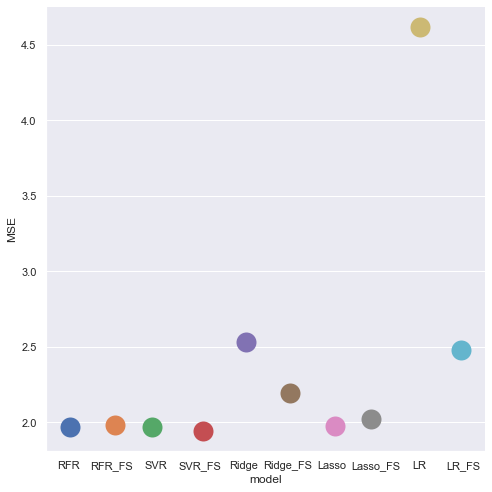

In [43]:
sns.catplot(x='model',y='MSE',data=df_res,height=7,size=7,s=20);

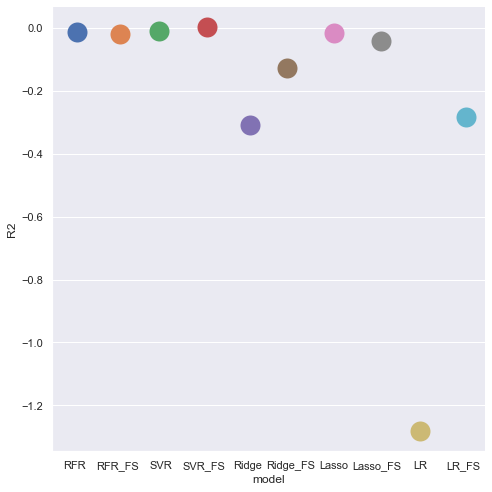

In [44]:
sns.catplot(x='model',y='R2',data=df_res,height=7,size=7,s=20);

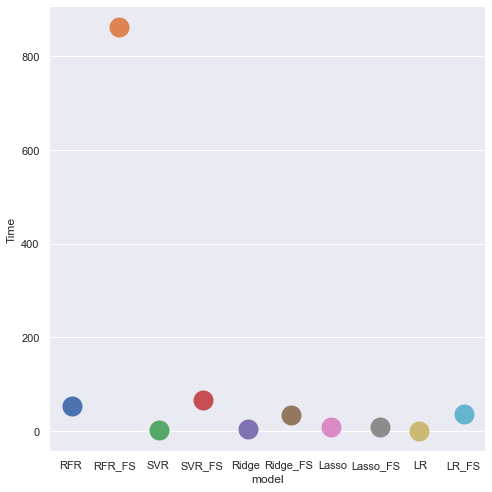

In [45]:
sns.catplot(x='model',y='Time',data=df_res,height=7,size=7,s=20);

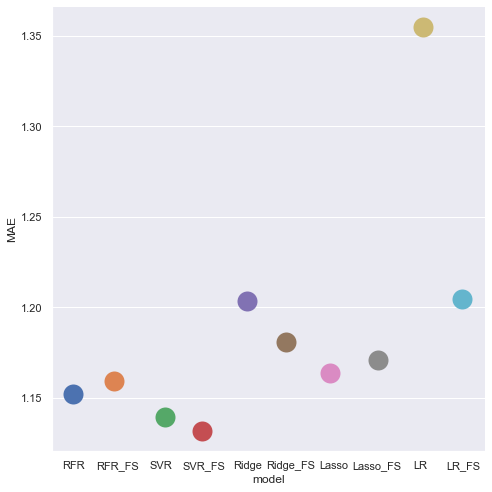

In [46]:
sns.catplot(x='model',y='MAE',data=df_res,height=7,size=7,s=20);

### Conclusion

>From the graphs I can see that the models with feature selection preform better on MSE and MAE.

>For R2 the scores were all negatives as can be the case when the variance in the test data is not captured by the variance in the model learned from the training data , this can be due to the small size of dataset. So in my conclusions I will not use it.





#### Linear Regression


##### With feature selection
* MSE:2.48 MAE:1.20 Time: 35.52 seconds 

##### Without feature selection 
* MSE:4.62 MAE:1.36 Time: 0.017 seconds

> Feature selection does take quite a bit more of time but it seems to really improve the model here

#### Lasso Regression

##### With feature selection and hyperparameter tuning
* MSE:2.02 MAE:1.17  Time:9.50 seconds

#### Without feature selection 

* MSE:1.97 MAE:1.16  Time:9.10 seconds

> Feature selection takes a comparable amount of time here as lasso leads to sparse coefficients and the model doesn't quite benfit from it

> Lasso regression preforms better than ordinary linear regression in both cases

#### Ridge Regression

##### With feature selection and hyperparameter tuning
* MSE:2.19 MAE:1.18  Time:33.90 seconds

#### Without feature selection 

* MSE:2.53 MAE:1.20 Time: 4.22 seconds 


> Feature selection takes much more time here but it does improve the model.

> Ridge regression preforms better than oridnary linear regression but worse than Lasso regression 

#### Support vector Regression 

##### With feature selection and hyperparameter tuning
* MSE:1.94 MAE:1.13 Time:66.71 seconds

#### Without feature selection 

* MSE:1.97 MAE:1.14 Time:1.48 seconds 

> Feature selection takes much more time here with no improvment.

> SVR however does have the best results among all the models

#### Random Regression Forest 

 
##### With feature selection and hyperparameter tuning
* MSE:1.98 MAE:1.16 Time: 863 seconds 

#### Without feature selection 

* MSE:1.97 MAE:1.15 Time: 53.20 seconds 

> Feature selection takes much more time here and result in a negligble improvment 

> Random forest results are comparable with the lasso regression model.

* In conclusion support vector machine has the best results, with feature selection significantly improving Ridge and Ordinary Linear regression. 

* Feature selection slighlty improves svr. 

* Models with feature selection actually preforms worse with random forest and Lasso regression

#### Limitations and improvments 

* More training data would definitely help and then I would get a more concrete R2 score as well.
* Wider hyperparameter grid to choose from and the compute resoruces to run it.
* 

# Refreneces
http://www3.dsi.uminho.pt/pcortez/fires.pdf
https://www.un-spider.org/category/disaster-type/forest-fire
https://sgp.fas.org/crs/misc/IF10244.pdf
https://www.epa.gov/air-research/wildland-fire-research-health-effects-research#:~:text=Wildfires%20increase%20air%20pollution%20in,heart%20failure%2C%20and%20premature%20death.
https://www.fs.usda.gov/pnw/page/fire-effects-environment
https://www.unlv.edu/news/article/unlv-study-southwest-desert-ecosystems-can-take-decades-recover-wildfires
https://www.sciencedirect.com/science/article/pii/S019005282100122X

### Thank you